In [2]:
import tensorflow as tf
import numpy as np
import Ipynb_importer

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./input_data', one_hot=True, validation_size=500)

import matplotlib.pyplot as plt

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./input_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./input_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./input_data\t10k-images-idx3-ubyte.gz
Extracting ./input_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# network 设计

In [4]:


"""
第一层为卷积层, 卷积层_1的参数  
input:  filter: 
        size: 5*5;  number: 6  channel:  1  
output: feature map: 
        size 28*28, number 6; channel :1
"""
CONV1_FILTER_SIZE = 5
CONV1_FILTER_CHANNEL = 1
CONV1_FILTER_NUM = 6

"""
第三层为卷积层, 卷积层_3的参数
input: filter:
       size 5 * 5   number 16 channel: 1
output: feature map
       size 10 * 10 number 16  channel: 1 
       
"""
CONV3_FILTER_SIZE = 5
CONV3_FILTER_CHANNEL = 1
CONV3_FILTER_NUM = 16

"""
第五层是一个卷积层, 
input: filter:
        size 5 *5    number 120   channel: 1
output: feature map
        size 1    number 120  channel: 1
"""
CONV5_FILTER_SIZE = 5
CONV5_FILTER_CHANNEL = 1
CONV5_FILTER_NUM = 120

"""
设置一些训练参数
"""
BATCH_SIZE = 100;

# LeNet_inference

def LeNet_inference(inTensor):
    
    """conv 1.  第一层为卷积层,有6个filter
    input size: 32 * 32 * 1
    output size: 28 * 28 * 6
    """
    conv1_filter = tf.Variable(tf.truncated_normal([CONV1_FILTER_SIZE,CONV1_FILTER_SIZE,CONV1_FILTER_CHANNEL, CONV1_FILTER_NUM],dtype=tf.float32))
    conv1 = tf.nn.conv2d(inTensor, conv1_filter, strides=[1, 1, 1, 1], padding='VALID')
    conv1_bias = tf.Variable(tf.truncated_normal([CONV1_FILTER_NUM], dtype=tf.float32))
    relu_1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    
    """pooling 2.  
     第2层为pooling层,与原始LetNet不同.原始的LeNet的pooling层有两个可训练参数
     input size: 28 * 28 * 6
     output size: 14 * 14 * 6
    """
    pooling2 = tf.nn.avg_pool(relu_1, ksize=[1,2,2,1], strides=[1, 2, 2 ,1], padding="VALID")
    relu_2 = tf.nn.relu(pooling2)
    
    
    """ conv 3  
    第3层为卷积层,共16个filter. 与原始LeNet不同,原始的LeNet是部分连接
    这里为了方便是,整体连接,详细情况见论文希捷
    input size 14 * 14 * 6
    out putsize 10 * 10 *16
    """
    conv3_filter = tf.Variable(tf.truncated_normal([5, 5, 6, 16]))
    conv3_bias = tf.Variable(tf.truncated_normal([16]))
    conv3 = tf.nn.conv2d(relu_2, conv3_filter, strides=[1,1,1,1],padding='VALID')
    relu_3 =tf.nn.relu(tf.nn.bias_add(conv3, conv3_bias))
    
    
    """pooling 4  
    第4层为pooling层, 与pooling 2 相同
    input size:  10 * 10 * 16
    output size: 5 * 5 * 16
    """
    pooling4 = tf.nn.avg_pool(relu_3, ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
    relu_4 = tf.nn.relu(pooling4)
    
    """conv 5
    第5层为conv层, 这一层与原始的LeNet-5是一致的
    input size: batch size * 5 * 5 * 16
    output size: batch size * 1  120
    """
    conv5_filter = tf.Variable(tf.truncated_normal([5, 5, 16, 120]))
    conv5_bias = tf.Variable(tf.truncated_normal([120]))
    conv5 = tf.nn.conv2d(relu_4, conv5_filter, strides=[1,1,1,1],padding="VALID")
    relu_5 = tf.nn.relu(tf.nn.bias_add(conv5, conv5_bias))

    relu_5_shaped = tf.reshape(relu_5, [100, 120], name="relu_5_reshape")#relu_5变为 batch size * 120
    
    """fc 6
    第6层为fc层,与原始不太一致,因为我只在mnist上进性试验
    input size: batch size * 1 * 1 * 120
    output size: batch size * 1 * 1 * 10
    """
    
    
        
    fc_weights = tf.Variable(tf.truncated_normal([120,10]))
    fc_bias = tf.Variable(tf.truncated_normal([10]))

    relu_6 = tf.nn.sigmoid(tf.nn.bias_add(tf.matmul(relu_5_shaped, fc_weights),fc_bias))
 
    
    """最后的输出单元
    softmax分类器
    """
    #logits = tf.nn.softmax(relu_6)
    #result = tf.one_hot(tf.argmax(tf.transpose(logits)), 10)
    return relu_6
    
    
    
    





# 训练过程设计

In [5]:
NUM_EPOCH = 10000 #迭代次数、
LEARNING_RATE = 0.001  # larning rate


x = tf.placeholder(dtype=tf.float32, shape=[BATCH_SIZE, 32, 32, 1],name="input")
y_predicted = LeNet_inference(x);
y_label = tf.placeholder(dtype=tf.float32, shape=[BATCH_SIZE, 10], name="label")

"""
loss function and optimization 

"""
loss_all = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_label, logits=y_predicted)
loss = tf.reduce_mean(loss_all)
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

loss_list = np.array([])

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(20000):
        xs,ys = mnist.train.next_batch(batch_size=BATCH_SIZE)

        #reshape the input 
        xs.shape = (BATCH_SIZE, 28, 28, 1)
        xs = np.pad(xs, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant', constant_values= 0)

        _, loss_np = sess.run([train_op, loss], feed_dict={x:xs, y_label:ys})
        if i% 500 == 0:
            loss_list = np.append(loss_list,loss_np )
            print("iteration: {} / 20000;  loss is {}".format(i, loss_np))
    print("training is end")

iteration: 0 / 20000;  loss is 2.4801745414733887
iteration: 500 / 20000;  loss is 2.427987575531006
iteration: 1000 / 20000;  loss is 2.449130058288574
iteration: 1500 / 20000;  loss is 2.3882336616516113
iteration: 2000 / 20000;  loss is 2.4539411067962646
iteration: 2500 / 20000;  loss is 2.341538906097412
iteration: 3000 / 20000;  loss is 2.436142683029175
iteration: 3500 / 20000;  loss is 2.426692485809326
iteration: 4000 / 20000;  loss is 2.358266592025757
iteration: 4500 / 20000;  loss is 2.380737543106079
iteration: 5000 / 20000;  loss is 2.315382957458496
iteration: 5500 / 20000;  loss is 2.399726629257202
iteration: 6000 / 20000;  loss is 2.385697841644287
iteration: 6500 / 20000;  loss is 2.2714219093322754
iteration: 7000 / 20000;  loss is 2.3409249782562256
iteration: 7500 / 20000;  loss is 2.3881030082702637
iteration: 8000 / 20000;  loss is 2.330941677093506
iteration: 8500 / 20000;  loss is 2.308046579360962
iteration: 9000 / 20000;  loss is 2.246957302093506
iteration:

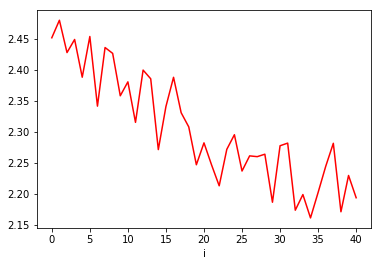

In [11]:
%matplotlib inline
plt.plot(loss_list, 'r')
plt.xlabel("i")

In [46]:
np.shape(a)

(3, 4, 5, 5)